In [2]:
import tensorrt
import tensorflow as tf

2023-06-17 11:53:50.773607: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import typing
import scipy

In [4]:
x = np.linspace(-5, 5, 100)

def plot(ax: plt.Axes, func: typing.Callable, formula: str = ''):
    ax.plot(x, func(x))
    ax.set_title(f'{func.__name__}: {formula}')
    ax.grid()

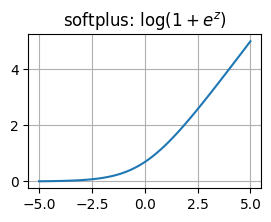

In [5]:
def softplus(z: np.ndarray):
    return np.log(1 + np.exp(z))

fig, ax = plt.subplots(figsize=(3,2))
plot(ax, softplus, '$\\log(1+e^{z})$')

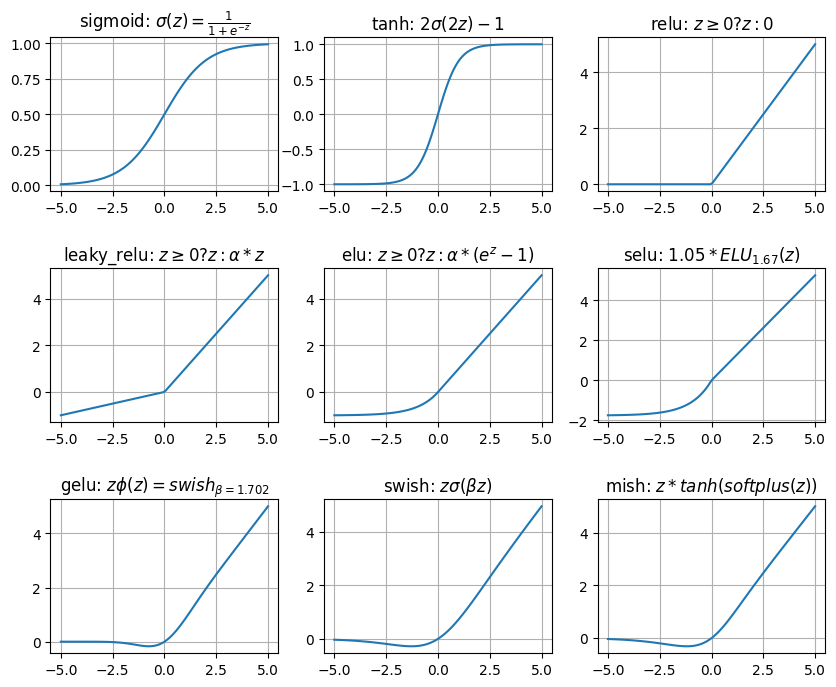

In [57]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return 2 * sigmoid(2 * z) - 1

def relu(z: np.ndarray):
    return np.maximum(0, z)

def leaky_relu(z: np.ndarray, alpha=0.2):
    return np.maximum(z * alpha, z)

def elu(z: np.ndarray, alpha=1):
    result = np.copy(z)  # Create a copy of z
    mask = z < 0  # Create a boolean mask for negative elements in z
    result[mask] = alpha * (np.exp(result[mask]) - 1)
    return result

def selu(z: np.ndarray):
    return 1.0507 * elu(z, 1.67326)

def gelu(z: np.ndarray):
    return z * scipy.stats.norm.cdf(z)

def swish(z: np.ndarray, beta=1):
    return z * sigmoid(beta * z)

def mish(z: np.ndarray):
    return z * tanh(softplus(z))

fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = np.array(axes).flatten()
plot(axes[0], sigmoid, '$\\sigma(z)=\\frac{1}{1+e^{-z}}$')
plot(axes[1], tanh, '$2\\sigma(2z)-1$')
plot(axes[2], relu, '$z\\geq0 ? z : 0$')
plot(axes[3], leaky_relu, '$z\\geq0 ? z : \\alpha*z$')
plot(axes[4], elu, '$z\\geq0 ? z : \\alpha*(e^{z}-1)$')
plot(axes[5], selu, '$1.05*ELU_{1.67}(z)$')
plot(axes[6], gelu, '$z\\phi(z) = swish_{\\beta=1.702}$')
plot(axes[7], swish, '$z\\sigma(\\beta z)$')
plot(axes[8], mish, '$z*tanh(softplus(z))$')
plt.subplots_adjust(hspace=0.5)
display()
